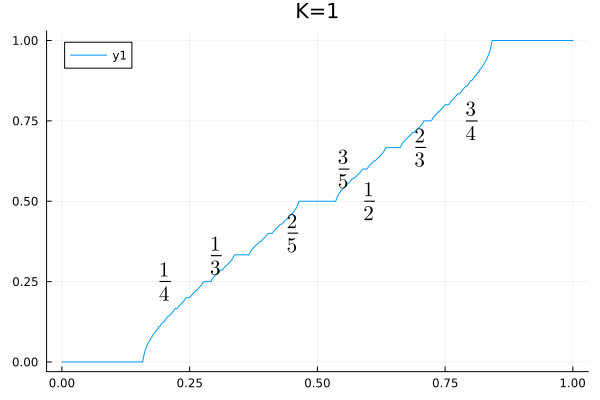

In [1]:
using Plots 

omegan = [0:0.002:1.;];
K = 1.0;

function winding(Omega, K)
    x0 = 0.3;
    x = x0;
    n = 1000;
    for i in 1:1:n
      x = x + Omega - K/(2*pi) * sin(2*pi*x)  
    end
    x0 = x;
    n = 10000;
    for i in 1:1:n
      x = x + Omega - K/(2*pi) * sin(2*pi*x)  
    end  
    w = (x-x0)/n
end

staircase = map(x -> winding(x, 0.5), omegan);
plot(omegan, staircase, title="K=0.5")


staircase = map(x -> winding(x, 1.0), omegan);
plot(omegan, staircase, title="K=1")

annotate!(0.2, 0.25,"\$\\frac{1}{4}\$")
annotate!(0.3, 0.33,"\$\\frac{1}{3}\$")
annotate!(0.6, 0.50,"\$\\frac{1}{2}\$")
annotate!(0.45, 2/5,"\$\\frac{2}{5}\$")
annotate!(0.55, 3/5,"\$\\frac{3}{5}\$")
annotate!(0.70, 2/3,"\$\\frac{2}{3}\$")
annotate!(0.80, 3/4,"\$\\frac{3}{4}\$")



In [8]:
Ks = [0:0.001:1;]
Omegas = [0:0.001:1;]
tol = 1.e-4

W = map(Iterators.product(Ks, Omegas)) do (K, Omega) 
    winding(Omega, K)
end

# filter

WG = map(W) do (x) 
   flag = 1
   for test in [0, 1, 1/2, 1/3, 2/3, 1/4, 3/4, 1/5, 2/5, 3/5, 4/5, 3/8, 7/8]

            if (abs(x-test) < 1.e-5) flag = 0   end
    end
    flag
end;



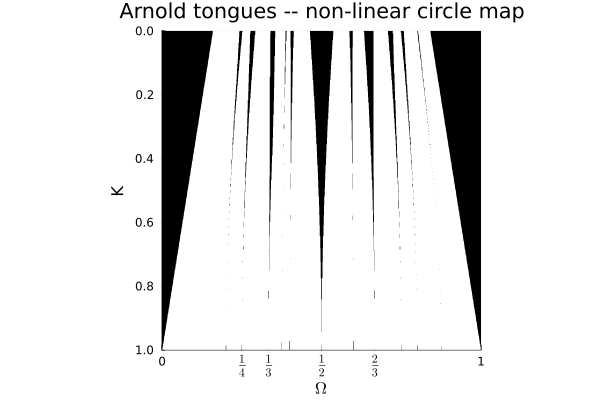

In [21]:
plot(Ks[end:-1:begin], Omegas, Gray.(WG[end:-1:begin,:]))
xlabel!("\$\\Omega\$")
ylabel!("K")
xlims!(0,1)
xticks!([0,1/4,1/3,1/2,2/3,1], ["0", "\$\\frac{1}{4}\$", "\$\\frac{1}{3}\$", "\$\\frac{1}{2}\$", "\$\\frac{2}{3}\$", "1"])
title!("Arnold tongues -- non-linear circle map")